In [9]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

In [10]:
# Read CSV file and extract data
df_collab_distance = pd.read_csv("papers_references_count_replaced_zerosoutput.csv")
original_faculties = list(df_collab_distance.columns)[1:]

In [11]:
# Replace spaces in faculty names with underscores and update column names
faculties = [faculty.replace(" ", "_") for faculty in original_faculties]
df_collab_distance.columns = [''] + faculties

C:\Users\33516\AppData\Local\Temp\ipykernel_12352\1563279841.py:15: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(similarity_matrix , method='single', metric='euclidean')


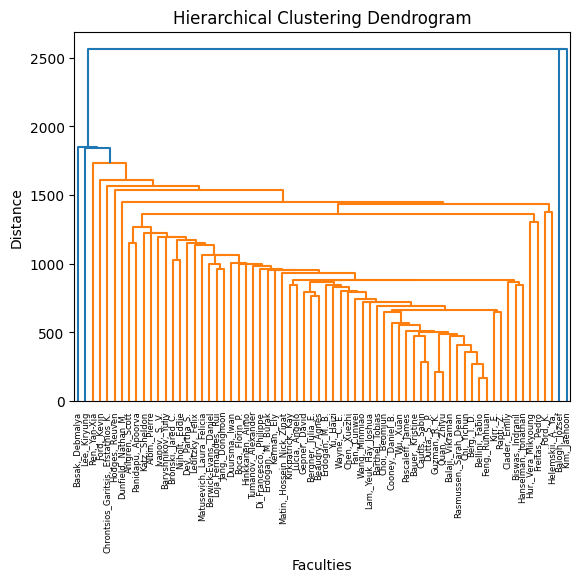

In [12]:
# Perform hierarchical clustering

#distance_marix = "%.15f" % df_collab_distance[faculties]
#distance_marix = [["%.15f" %int(cell) for cell in row] for row in df_collab_distance[faculties]]
similarity_matrix  = df_collab_distance[faculties].to_numpy().astype(float)

#formatted_similarity_matrix = ["{:.5f}".format(cell) for cell in similarity_matrix.flatten()]
#scaling_factor = 1e-20  


#scaled_similarity_matrix = [float(cell) * scaling_factor for cell in formatted_similarity_matrix]


#formatted_similarity_matrix = 0.0000000000000001 * formatted_similarity_matrix
linkage_matrix = linkage(similarity_matrix , method='single', metric='euclidean')

# Generate dendrogram
dendrogram(linkage_matrix, labels=faculties, leaf_rotation=90)
plt.xlabel("Faculties")
plt.ylabel("Distance")
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

In [13]:
# Save hierarchical clustering result as Newick format tree
from scipy.cluster.hierarchy import to_tree

# Convert hierarchical clustering result to tree structure
tree = to_tree(linkage_matrix)

In [15]:
# Recursive function to generate Newick format tree
def to_newick(node):
    if node.is_leaf():
        #return str(node.get_id())
        return f"{faculties[node.id]}"
    left_str = to_newick(node.left)
    right_str = to_newick(node.right)
    return f'({left_str}:{node.dist},{right_str}:{node.dist})'
    #return f"({left_str},{right_str}):{node.dist}"

print("*****Newick format tree*****")
print(to_newick(tree))


*****Newick format tree*****
((Basak,_Debmalya:1850.8831372706788,(Lee,_Kiryung:1841.7188657879285,(Ren,_Yan-Xia:1733.5509817904494,(Ford,_Kevin:1611.0512002412486,(Chrontsios_Garitsis,_Efstathios_K.:1564.4857485163311,(Hodges,_Reuven:1539.7361928932496,(Dunfield,_Nathan_M.:1448.7832619017329,((((Ahlgren,_Scott:1149.7076841952853,Panidapu,_Apoorva:1149.7076841952853):1268.9279861623816,(Katz,_Sheldon:1226.030983623126,(Albin,_Pierre:1225.7248379274056,(Ivanov,_S._V.:1196.4564651478622,(Baryshnikov,_Yuliy:1192.026077629768,((Bronski,_Jared_C.:1026.536496749913,Nijholt,_Eddie:1026.536496749913):1170.3978947576475,(Dey,_Partha_S.:1153.1345869488457,(Leditzky,_Felix:1136.0713821555198,(Matusevich,_Laura_Felicia:1066.6368271622168,((Berwick-Evans,_Daniel:1001.8003173014688,(Loja_Fernandes,_Rui:965.318612780049,Jang,_Donghoon:965.318612780049):1001.8003173014688):1064.756190473854,(Duursma,_Iwan:1002.1635022390219,(Boca,_Florin_P.:999.6796236559426,(Hinkkanen,_Aimo:998.459961368574,(Tumanov,